# Data Analysis

Aquí analizamos los datos obtenidos en las mediciones anteriores (1, 2, 3).  
El alcance de este análisis es proporcionar una visión inspectiva sobre los diferentes niveles de sonido muestreados en el interior de los edificios, principalmente residenciales (medidas 1, 2) y actividades comerciales (medida 3).  

> Los valores límite para las mediciones se extraen del Decreto Ley 50/2025, pero dado que las instrucciones técnicas no fueron seguidas correctamente, no tienen valor a nivel legal, sino que solo son especulativos.


In [ ]:
import os

# Listado de colores para que el texto salga bonito por pantalla.
Red = '\033[91m'
Green = '\033[92m'
Blue = '\033[94m'
Cyan = '\033[96m'
White = '\033[97m'
Yellow = '\033[93m'
Magenta = '\033[95m'
Grey = '\033[90m'
Black = '\033[90m'
Default = '\033[99m'

# Paths to data directories. 
path_1 = 'log_files/medida_1'
path_2 = 'log_files/medida_2'
path_3 = 'log_files/medida_3'

if not os.path.exists(path_1):
    print(Yellow + 'Could not find path to medida 1 data')
if not os.path.exists(path_2):
    print(Yellow + 'Could not find path to medida 2 data')
if not os.path.exists(path_3):
    print(Yellow + 'Could not find path to medida 3 data')


### Medida 1 data

Extracción de los datos de la medida 1: mediciones dentro de un edificio residencial con la ventana cerrada.

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load files from folders
files = os.listdir(path_1)

# Store means, peaks and stdevs 
# The disctionary has key = hour, value = global mean value / max peak value / standard deviation
means_1 = {}
peaks_1 = {}
stdev_1 = {}

# Lists of all means sampled during week and weekend
# The dictionary has key = hour, value = means
allMeans = {}
allMeansWe = {}


for fn in files:
    #print(Grey+fn)
    splitted_fn = fn.split(' ')
    #print(splitted_fn)
    fn_type = splitted_fn[0]
    fn_day = splitted_fn[1]
    fn_date = splitted_fn[2]
    fn_hour = splitted_fn[3]

    # Store means relative to certain day and hour
    if fn_type == 'type_2' and fn_day in ['Wed', 'Thu']:
        with open(path_1+'/'+fn, 'r') as f:
            data = json.load(f)
        #print(White+fn)

        hour = fn_hour[:2]
        #print(Grey+f'Hour: {hour}')
        
        means = [m['mean'] for m in data]
        allMeans[hour] = means
        global_mean = round(np.mean(means),2)
        means_1[hour] = global_mean
        #print(Cyan+f'Mean: {global_mean}')

        peaks = [p['max'] for p in data]
        #print(Magenta+f'Peak: {max(peaks)}')
        peaks_1[hour] = max(peaks)

        stdev = round(np.std(peaks),2)
        #print(Yellow+f'Stdev (calculated along peak values): {stdev}')
        stdev_1[hour] = stdev

    if fn_type == 'type_2' and fn_day in ['Sat', 'Sun']:
        with open(path_1+'/'+fn, 'r') as f:
            data = json.load(f)
        #print(White+fn)

        hour = fn_hour[:2]
        #print(Grey+f'Hour: {hour}')
        
        means_we = [m['mean'] for m in data]
        allMeansWe[hour] = means_we
        
    

## Análisis de Diferencias de Medias entre Días Laborales y Fines de Semana, en el Mismo Horario y Condiciones 

Este análisis tiene como objetivo visualizar y comparar los datos. Su alcance va más allá de una evaluación legal del cumplimiento de los valores límite. No obstante, para tener una idea de los niveles medidos en comparación con los límites establecidos por el Decreto 50/2025, se ha incluido un umbral en los gráficos. El decreto 50/2025 afirma que:

> Según lo dispuesto en el Anexo I del Real Decreto 1513/2005, de 16 de diciembre, los mapas estratégicos de ruido, en lo referente a la evaluación y gestión del ruido ambiental, deberán utilizar los siguientes índices y procedimientos de medición de la contaminación acústica. Se utilizarán como índices de valoración:
> - **Ld**: Indicador de ruido en periodo día (7:00 a 21:00 horas).
> - **Le**: Indicador de ruido en periodo tarde (19:00 a 23:00 horas).
> - **Ln**: Indicador de ruido en periodo noche (23:00 a 7:00 horas).

La referencia para el umbral se encuentra en la siguiente tabla técnica, en la cual se hace referencia al caso **residencial - dormitorios**.



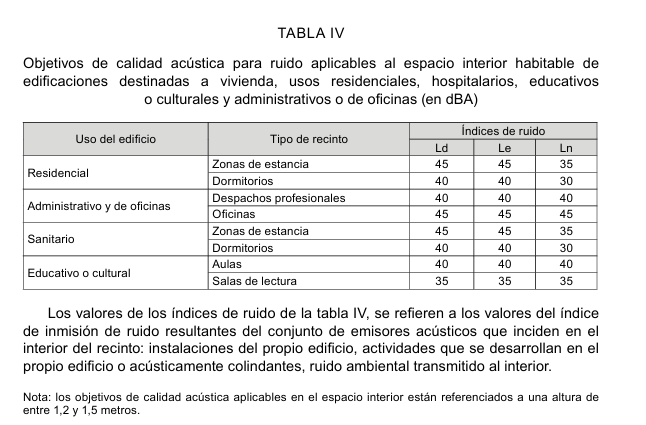

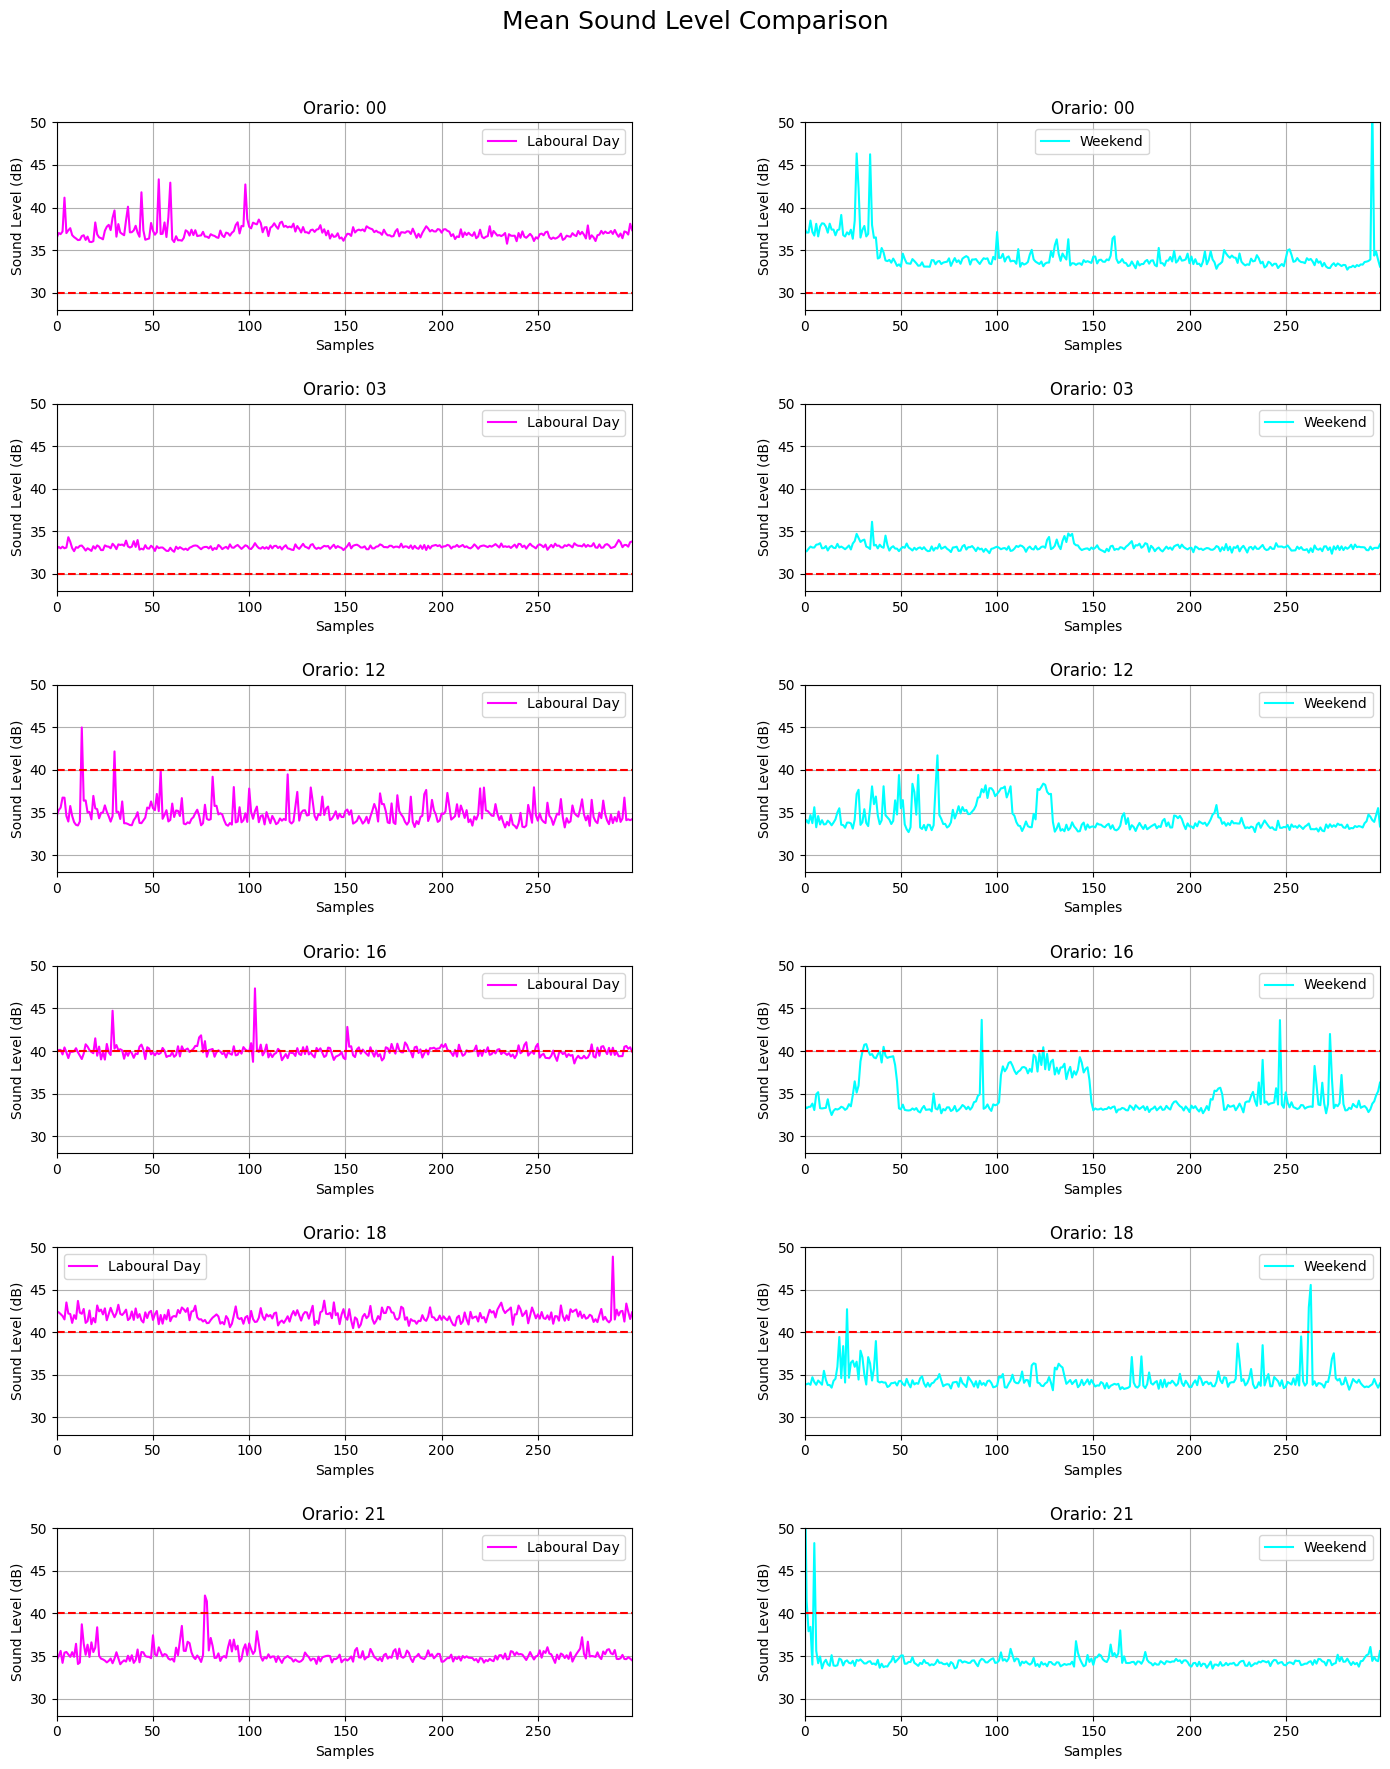

In [3]:
import matplotlib.pyplot as plt

def plot_sound_levels(allMeans, allMeansWe):
    hours = list(allMeans.keys())  

    fig, axs = plt.subplots(6, 2, figsize=(14, 18))
    fig.suptitle("Mean Sound Level Comparison", fontsize=18)
    
    
    for i, hour in enumerate(hours):
        row = i % 6
        
        # Graph for laboural days
        means = allMeans[hour]
        m_number = list(range(len(means)))
        axs[row, 0].plot(m_number, means, label="Laboural Day", color="magenta")
        axs[row, 0].set_xlim(0, len(m_number) - 1)
        axs[row, 0].set_ylim(28, 50)
        axs[row, 0].set_xlabel("Samples")
        axs[row, 0].set_ylabel("Sound Level (dB)")
        axs[row, 0].set_title(f'Orario: {hour}')
        axs[row, 0].grid(True)
        axs[row, 0].legend()

        # Threshold
        if 7 <= int(hour) < 23:
            axs[row, 0].axhline(y=40, color='red', linestyle='--', label="40 dB Threshold")
        else:
            axs[row, 0].axhline(y=30, color='red', linestyle='--', label="30 dB Threshold")
        
        # Graph for weekend
        means_we = allMeansWe[hour]
        m_number = list(range(len(means_we)))
        axs[row, 1].plot(m_number, means_we, label="Weekend", color="cyan")
        axs[row, 1].set_xlim(0, len(m_number) - 1)
        axs[row, 1].set_ylim(28, 50)
        axs[row, 1].set_xlabel("Samples")
        axs[row, 1].set_ylabel("Sound Level (dB)")
        axs[row, 1].set_title(f'Orario: {hour}')
        axs[row, 1].grid(True)
        axs[row, 1].legend()

        # Threshold
        if 7 <= int(hour) < 23:
            axs[row, 1].axhline(y=40, color='red', linestyle='--', label="40 dB Threshold")
        else:
            axs[row, 1].axhline(y=30, color='red', linestyle='--', label="30 dB Threshold")

    plt.tight_layout(rect=[0, 0, 1, 0.96], h_pad=2, w_pad=1)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()

plot_sound_levels(allMeans, allMeansWe)


### Medida 2 data
Extracción de los datos de la medida 2: mediciones dentro de un edificio residencial con la ventana abierta.

In [4]:
# Load files from folders
files = os.listdir(path_2)

# Lists to store data
# The disctionary has key = hour, value = global mean value / max peak value / standard deviation
means_2 = {}
peaks_2 = {}
stdev_2 = {}

for fn in files:
    splitted_fn = fn.split(' ')
    fn_type = splitted_fn[0]
    fn_day = splitted_fn[1]
    fn_date = splitted_fn[2]
    fn_hour = splitted_fn[3]

    if fn_type == 'type_2' and fn_day in ['Wed', 'Thu']:
        with open(path_2+'/'+fn, 'r') as f:
            data = json.load(f)

        hour = fn_hour[:2]

        means = [m['mean'] for m in data]
        global_mean = round(np.mean(means),2)
        means_2[hour] = global_mean

        peaks = [p['max'] for p in data]
        peaks_2[hour] = max(peaks)

        stdev = round(np.std(peaks),2)
        stdev_2[hour] = stdev

## Diferencias entre ventana cerrada y ventana abierta
En este análisis se van a comparar los diferentes niveles de ruido ambiental medidos en la misma franja horaria, con condiciones diferentes (ventana cerrada - ventana abierta). Los datos utilizados para este análisis corresponden a los días laborables, y se ofrece una comparación con los picos, medias y desviaciones estándar.

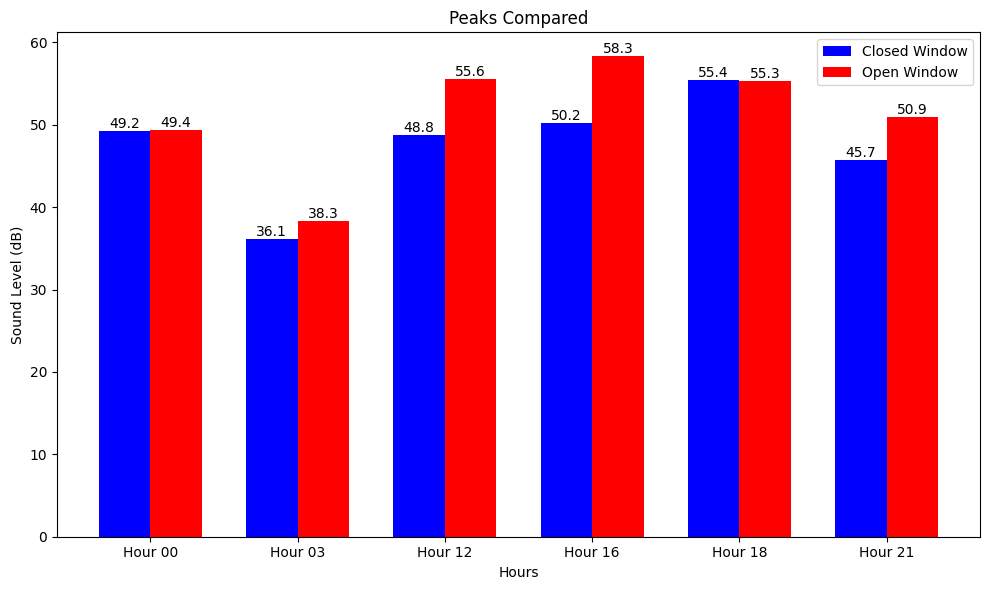

In [5]:
# Set up the figure
plt.figure(figsize=(10, 6))

n = len(peaks_1)
x = np.arange(n)  
width = 0.35

# Create bars
bars1 = plt.bar(x - width/2, peaks_1.values(), width, label='Closed Window', color='blue')
bars2 = plt.bar(x + width/2, peaks_2.values(), width, label='Open Window', color='red')

plt.xlabel('Hours')
plt.ylabel('Sound Level (dB)')
plt.title('Peaks Compared')
plt.xticks(x, [f'Hour {i}' for i in peaks_1.keys()])
plt.legend()

# Add value labels on top of each bar
for bars in (bars1, bars2):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height}',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

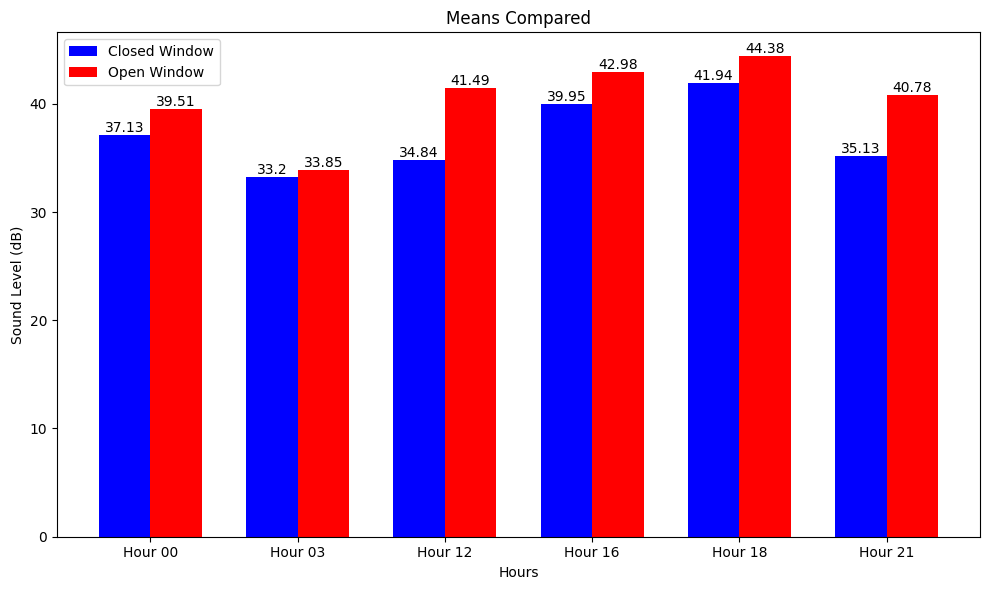

In [6]:
plt.figure(figsize=(10, 6))

n = len(peaks_1)
x = np.arange(n)
width = 0.35  

# Create bars
bars1 = plt.bar(x - width/2, means_1.values(), width, label='Closed Window', color='blue')
bars2 = plt.bar(x + width/2, means_2.values(), width, label='Open Window', color='red')

plt.xlabel('Hours')
plt.ylabel('Sound Level (dB)')
plt.title('Means Compared')
plt.xticks(x, [f'Hour {i}' for i in means_1.keys()])
plt.legend()

# Add value labels on top of each bar
for bars in (bars1, bars2):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height}',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

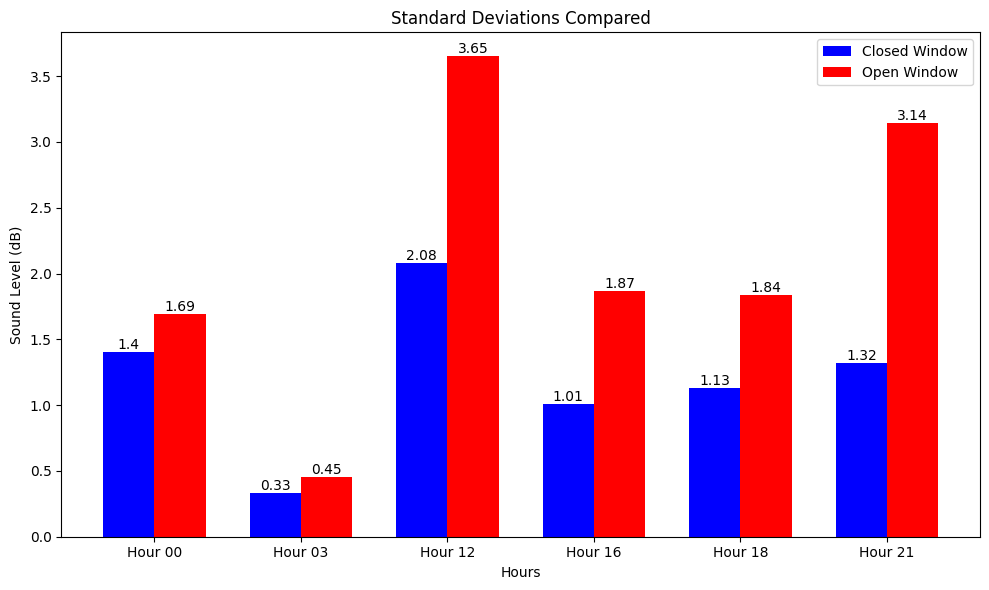

In [7]:
plt.figure(figsize=(10, 6))

n = len(peaks_1)
x = np.arange(n) 
width = 0.35  

# Create bars
bars1 = plt.bar(x - width/2, stdev_1.values(), width, label='Closed Window', color='blue')
bars2 = plt.bar(x + width/2, stdev_2.values(), width, label='Open Window', color='red')

plt.xlabel('Hours')
plt.ylabel('Sound Level (dB)')
plt.title('Standard Deviations Compared')
plt.xticks(x, [f'Hour {i}' for i in means_1.keys()])
plt.legend()

# Add value labels on top of each bar
for bars in (bars1, bars2):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height}',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Medida 3 data
Extracción de los datos de la medida 3: mediciones dentro de un edificio de actividad comercial.

In [8]:
# Load files from folders
files = os.listdir(path_3)

# Lists to store data
# The disctionary has key = hour, value = means / peaks
means_3 = {}
peaks_3 = {}

for fn in files:
    splitted_fn = fn.split(' ')
    fn_type = splitted_fn[0]
    fn_day = splitted_fn[1]
    fn_date = splitted_fn[2]
    fn_hour = splitted_fn[3]

    if fn_type == 'type_2':
        with open(path_3+'/'+fn, 'r') as f:
            data = json.load(f)

        hour = fn_hour[:2]

        means = [m['mean'] for m in data]
        means_3[hour] = means

        peaks = [p['max'] for p in data]
        peaks_3[hour] = peaks

## Análisis del Cumplimiento de los Niveles de Ruido en el Interior de Edificios de Actividad Comercial Turística

Este análisis tiene como objetivo visualizar y comparar los datos. Su alcance va más allá de una evaluación legal del cumplimiento de los valores límite. No obstante, para tener una idea de los niveles medidos en comparación con los límites establecidos por el Decreto 50/2025, se ha incluido un umbral en los gráficos.

La referencia para el umbral se encuentra en la siguiente tabla técnica, en la cual se hace referencia al caso **sectores del territorio con predominio de suelo de uso característico turístico o de otro uso terciario no contemplado en el tipo c**.

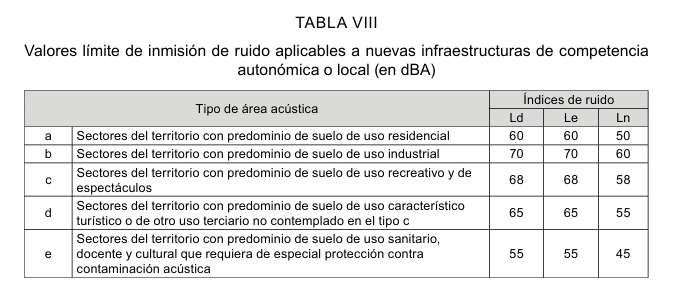

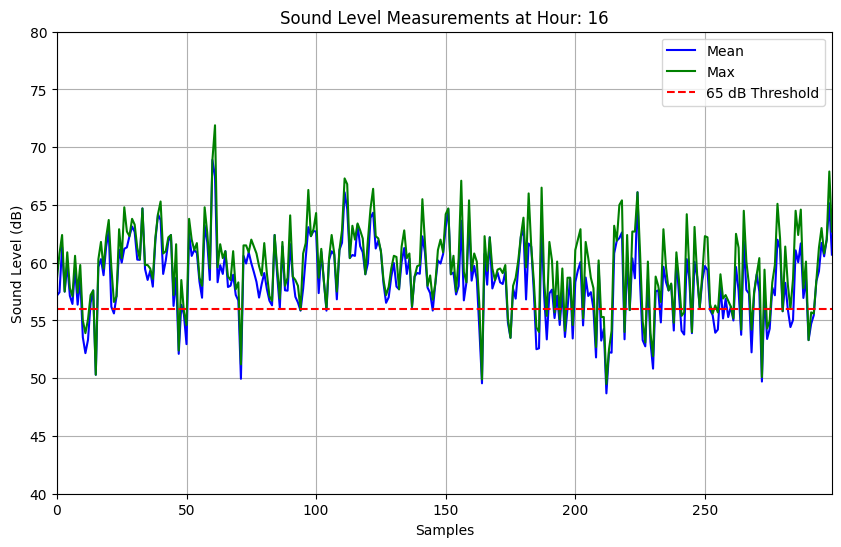

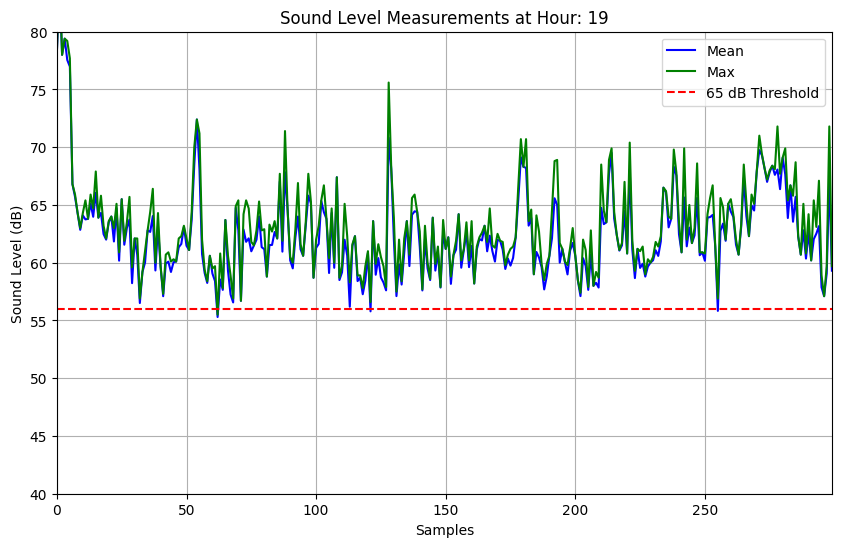

In [ ]:
# Plot means, peaks and reference threshold
for k in means_3.keys():
    m_number = list(range(0,len(means_3[k])))
    plt.figure(figsize=(10, 6))
    plt.plot(m_number, means_3[k], label="Mean", color="blue")
    plt.plot(m_number, peaks_3[k], label="Max", color="green")
    plt.axhline(y=56, color='red', linestyle='--', label="65 dB Threshold")
    plt.xlim(0, len(means_3[k])-1)
    plt.ylim(40, 80)
    plt.xlabel("Samples")
    plt.ylabel("Sound Level (dB)")
    plt.title(f'Sound Level Measurements at Hour: {k}')
    plt.legend()
    plt.grid(True)
    plt.show()
